# Проведение А/В теста интернет-магазина

Маркетолог интернет-магазина подготовил список гипотез для увеличения выручки магазина. Также переданы данные о прошедшем А/В тесте.<br>

**Цель проекта:** 
- приоретизировать гипотезы 
- проанализировать результаты прошедшего А/В теста и сделать выводы<br>

## Загрузка и подготовка исходных данных

### Описание данных

Таблица `/datasets/orders.csv`:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Таблица `/datasets/hypothesis.csv`:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Таблица `/datasets/visitors.csv`:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
from io import BytesIO
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import scipy.stats as stats

import sweetviz as sv

###  Загрузка данных

Пропишем пути к исходным файлам

In [2]:
#пропишем путь к файлу с заказами
try:
    orders = pd.read_csv('D:\_THIS IS MY FOLDER\Я.Практикум, аналитика\Проекты\orders.csv', sep=',')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


                                             |          | [  0%]   00:00 -> (? left)


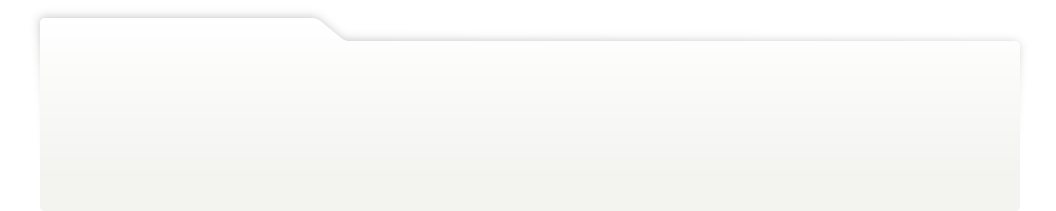
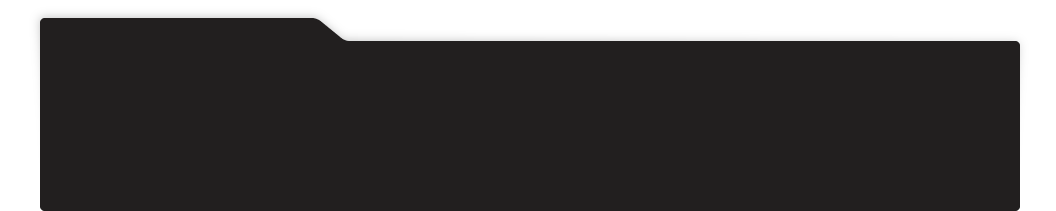
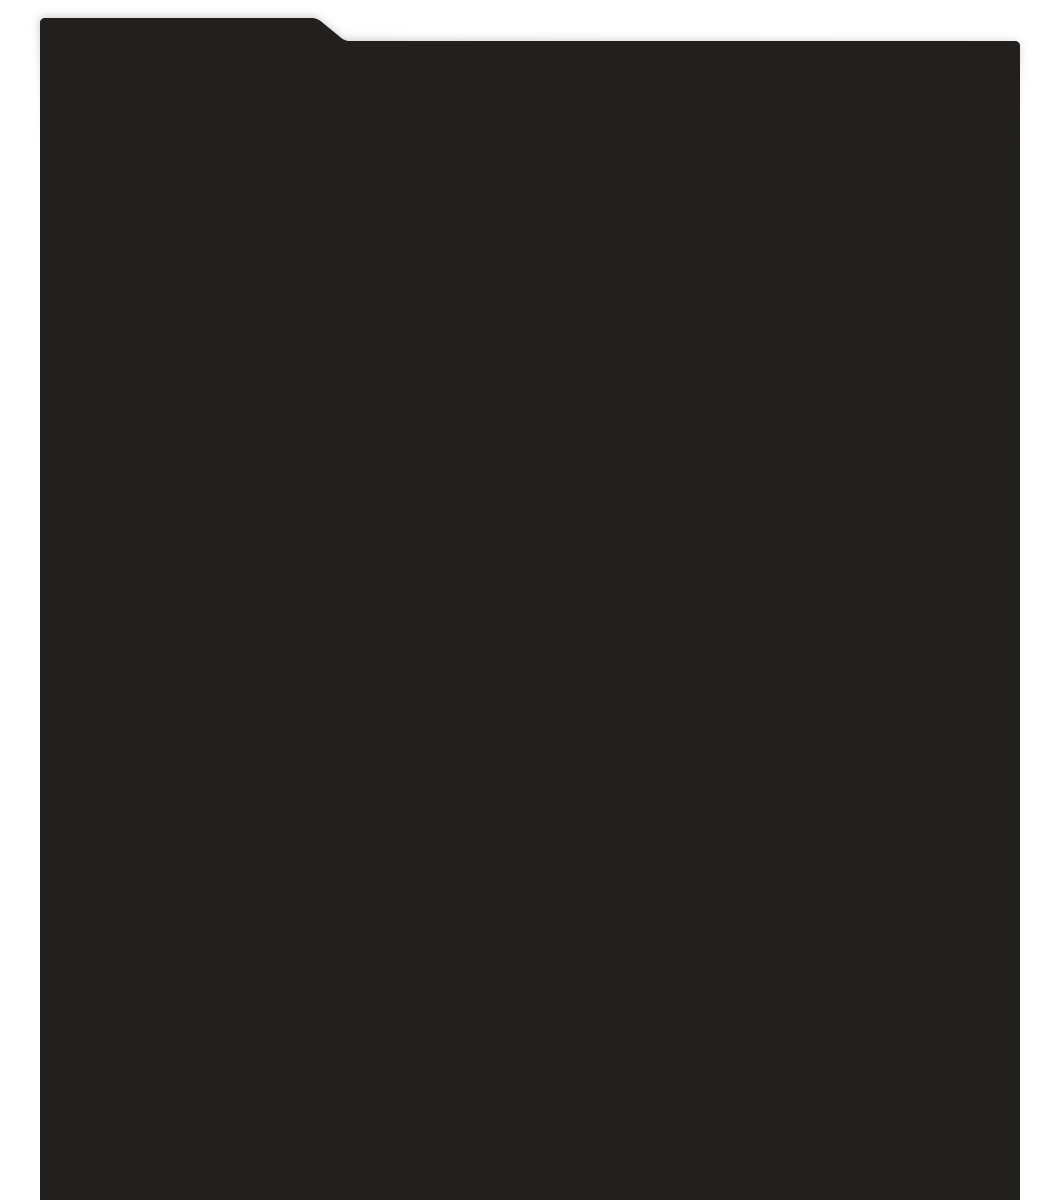
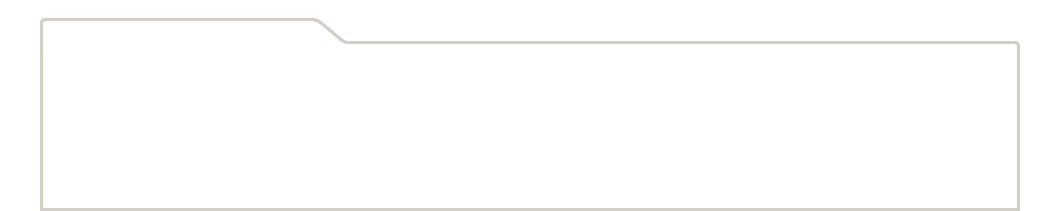
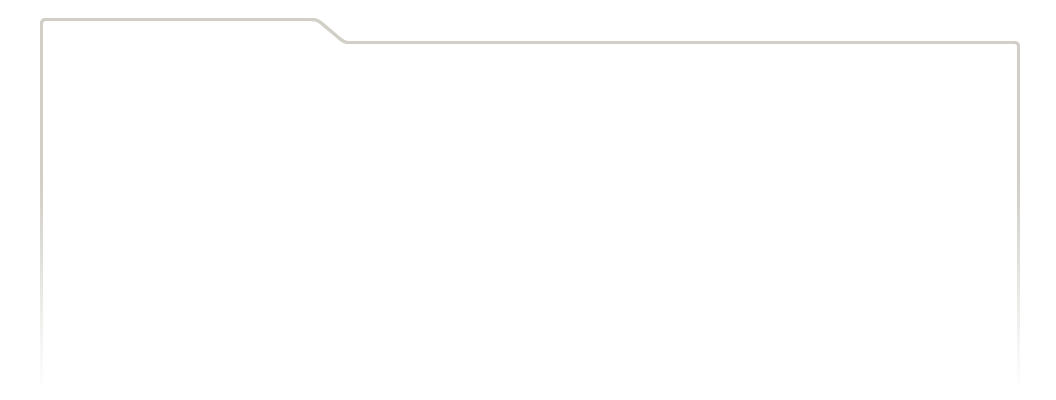
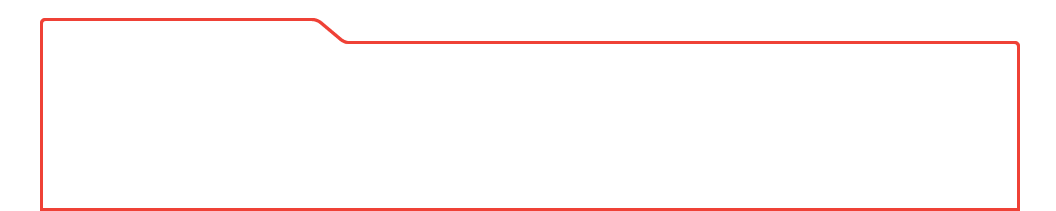
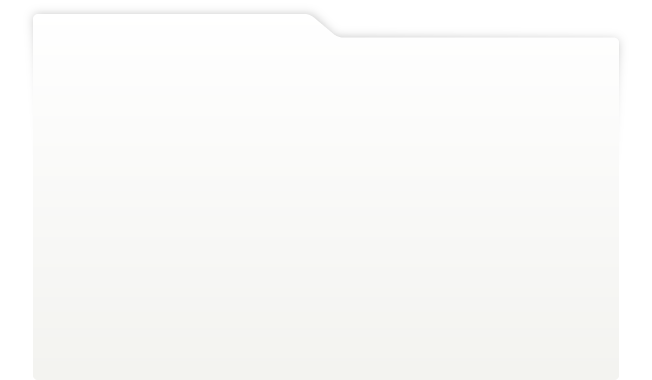
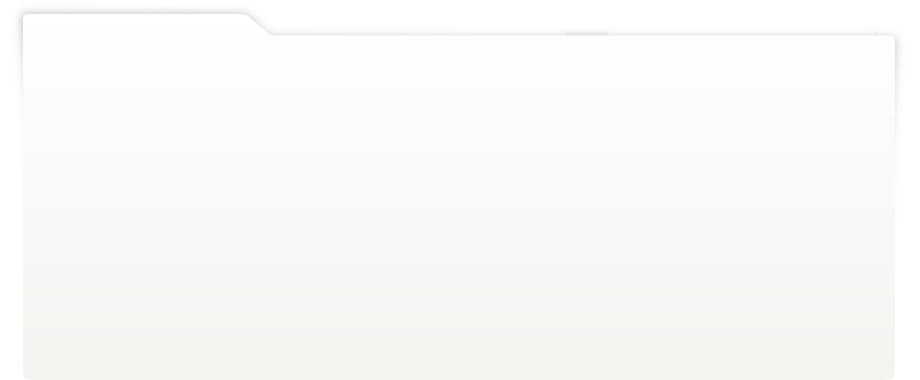
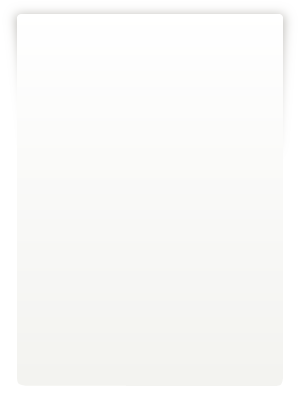
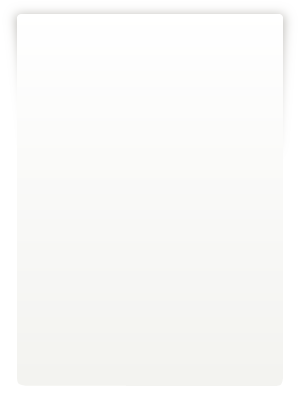
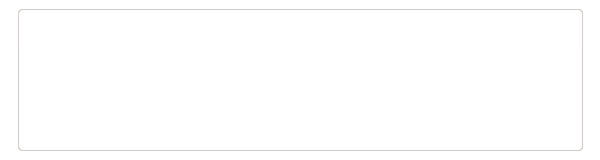
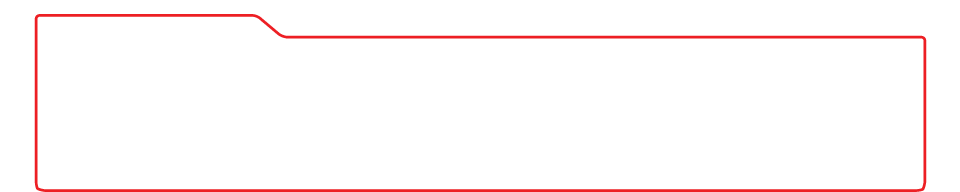
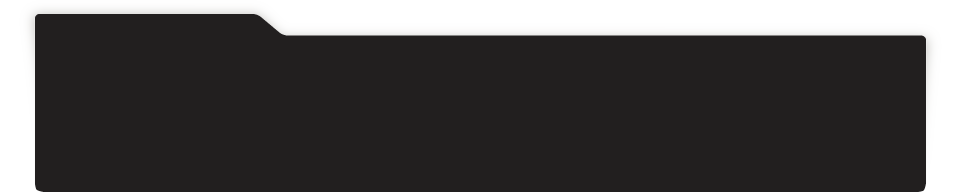
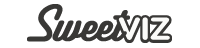
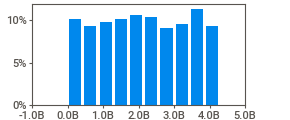
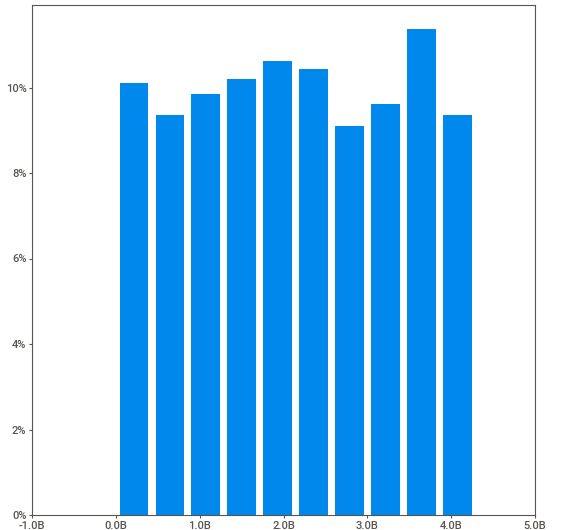
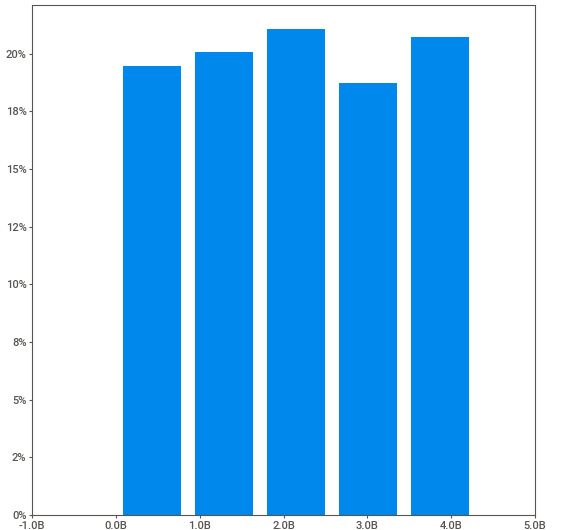
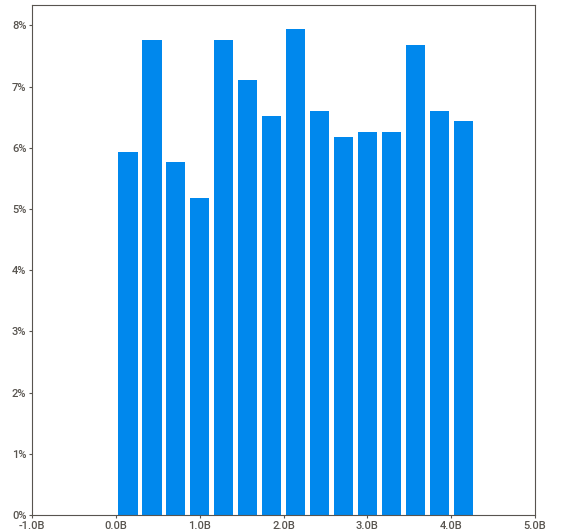
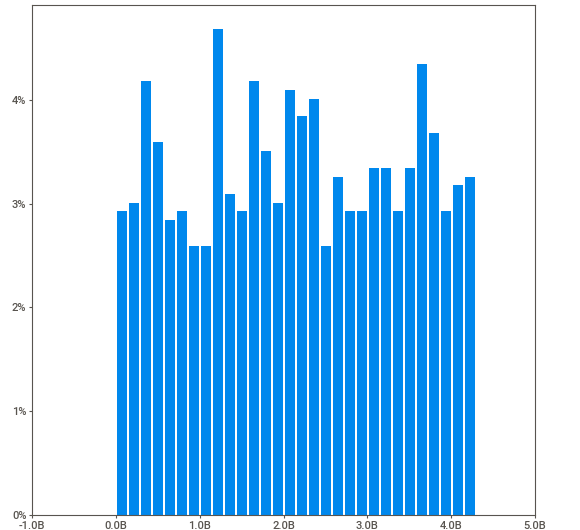
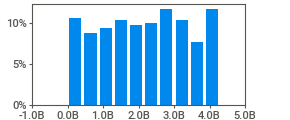
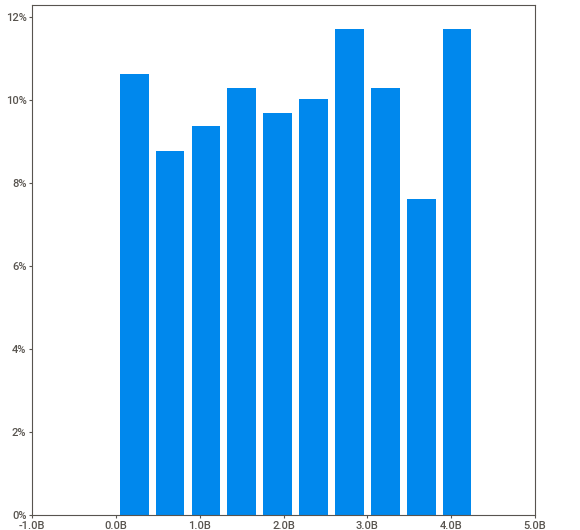
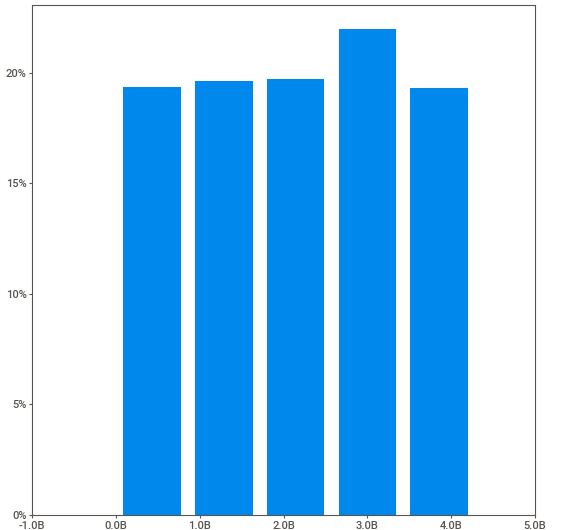
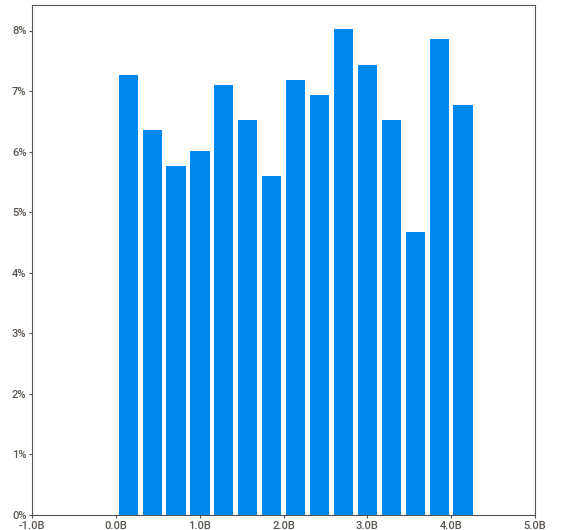
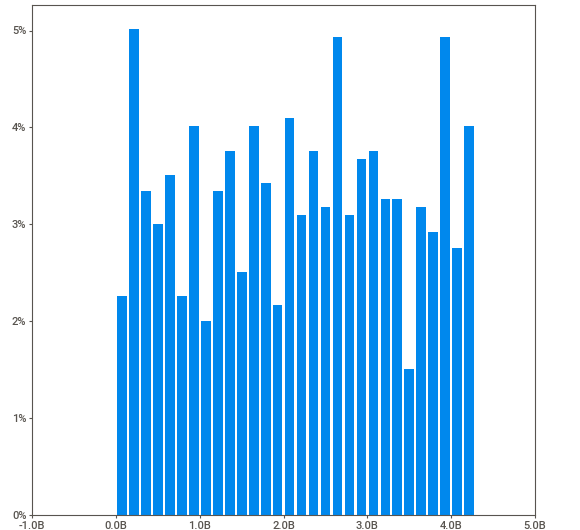
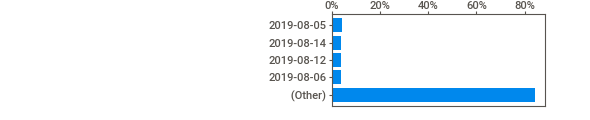
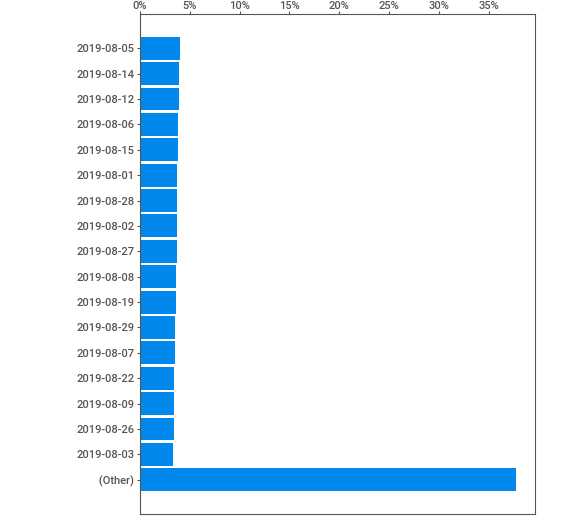
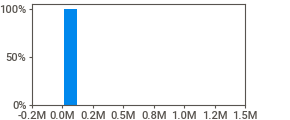
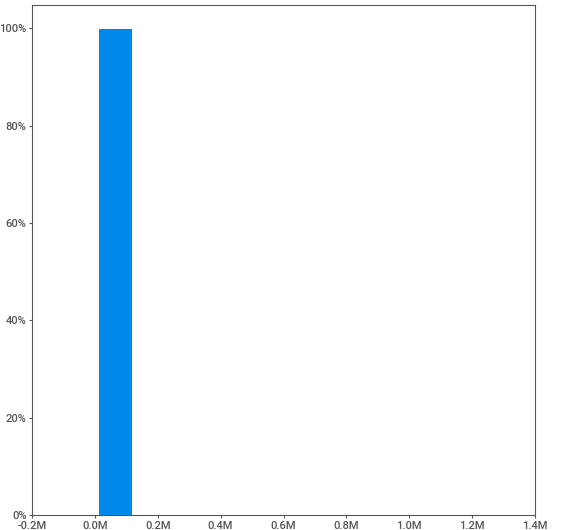
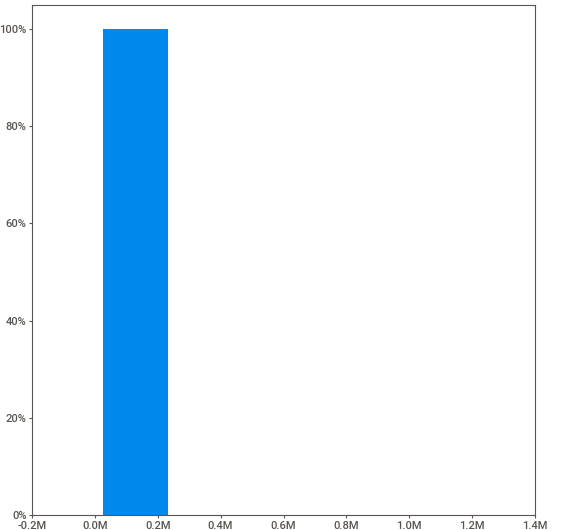
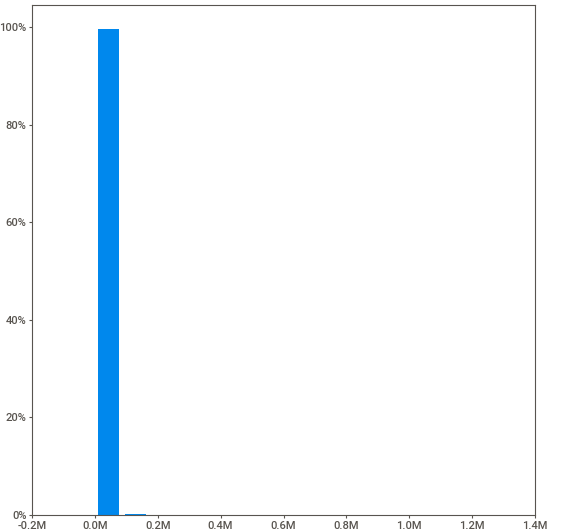
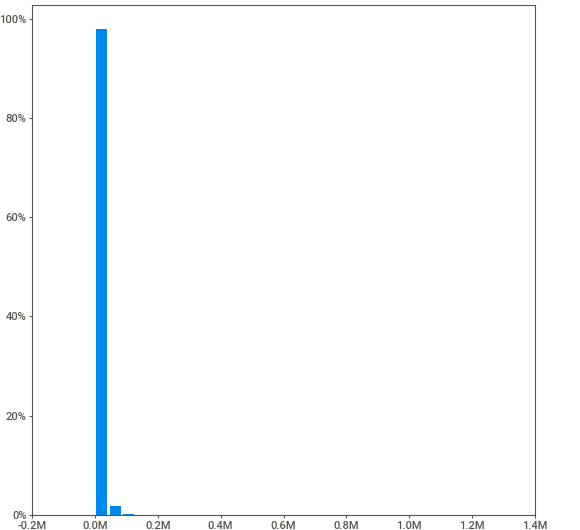
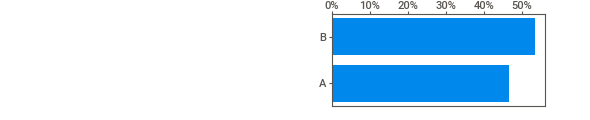
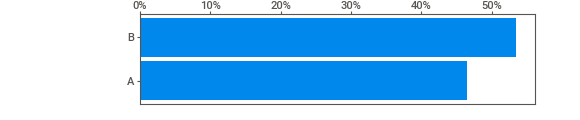
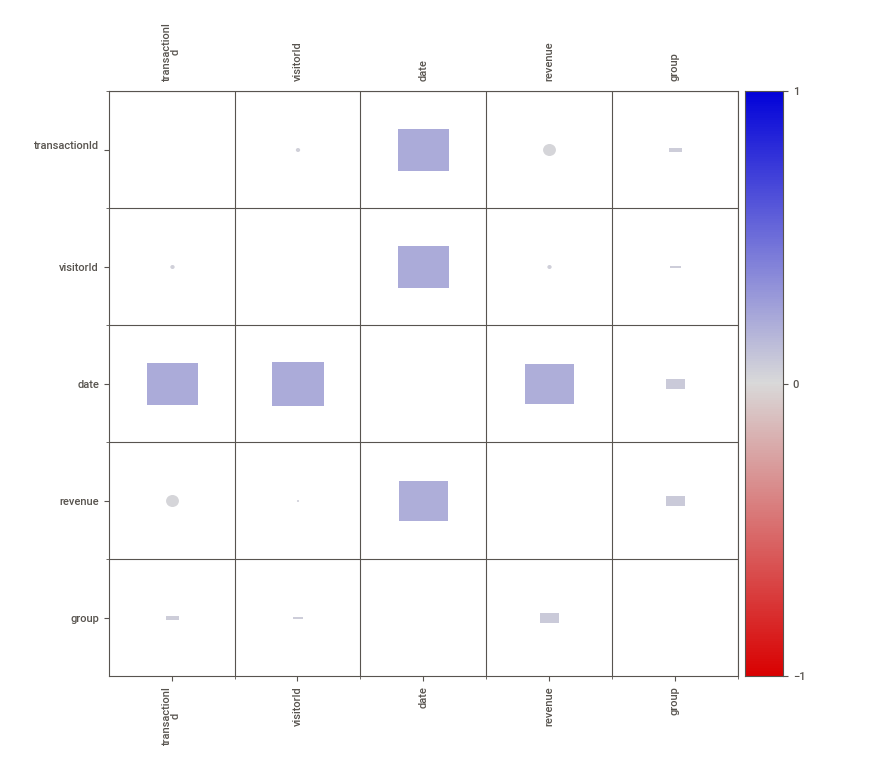
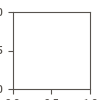

In [3]:
my_report = sv.analyze(orders)
my_report.show_notebook()

In [4]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В данных представлены данные только о пользователях, разделенных на 2 группы: А и B.

In [5]:
#преобразуем тип данных в datetime
orders['date'] = pd.to_datetime(orders['date'])

In [6]:
#пропишем путь к файлу с визитами
spreadsheet_id = '1nCC43r98FAtu_dkbbyLC0zBE6ztTv1IxBGvqDc1VXCc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
visits = pd.read_csv(BytesIO(r.content))
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
#review data info
def data_info(df):
    print(f'Размер таблицы {df.shape}')
    
    df.info()

    print(f'Количество дубликатов {df.duplicated().sum()}')

In [8]:
data_info(visits)

Размер таблицы (62, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов 0


In [9]:
visits['group'].unique()

array(['A', 'B'], dtype=object)

В табличке visitors также нет никаких ошибок с присваиванием метки группы для кажого пользователя

In [10]:
#преобразуем тип данных в datetime
visits['date'] = pd.to_datetime(visits['date'])

In [11]:
visits['date'].max()

Timestamp('2019-08-31 00:00:00')

In [12]:
visits['date'].min()

Timestamp('2019-08-01 00:00:00')

Тест проходил с 01 по 31 августа 2019 года.

In [13]:
#пропишем путь к файлу с гипотезами
try:
    hypothesis = pd.read_csv('D:\_THIS IS MY FOLDER\Я.Практикум, аналитика\Проекты\hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    
pd.set_option('display.max_colwidth', None)    

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [14]:
hypothesis.duplicated().sum()

0

В данных нет пропусков, дубликатов и ошибок.

#### Вывод

В исходных данных нет ошибок и дубликатов. Предобработка данных не требуется.

## Приоритезация гипотез

### Приоритезация по методу ICE

In [15]:
#посчитаем ICE для гипотез и добавим его к уже существующей таблицу в колонку 'ICE'
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

#округлим получившиеся значения до одной цифры после запятой
hypothesis['ICE'] = hypothesis['ICE'].round(1)

#отсортируем по убыванию приоритета для каждой гипотезы
hypothesis[['Hypothesis','ICE']].sort_values(by ='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее перспективные гипотезы:
- 8 Запустить акцию, дающую скидку на товар в день рождения
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Приоритезация по методу RICE

In [16]:
#посчитаем ICE для гипотез и добавим его к уже существующей таблицу в колонку 'ICE'
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

#округлим получившиеся значения до одной цифры после запятой
hypothesis['RICE'] = hypothesis['RICE'].round(1)

#отсортируем по убыванию приоритета для каждой гипотезы
hypothesis[['Hypothesis','RICE']].sort_values(by ='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы:
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

### Вывод

И по методу приоритезации гипотез RICE, и по методу ICE приоритетными являются гипотезы 7, 0 и 6, но в разном порядке.<br>
При подсчете по методу RICE в числитель добавляется множитель Reach  - сколько пользователей затронет изменение. Именно этот параметр привел к тому, что приоритезация гипотез по обоим методам оказалась разной. Так, Reach для 7-ой гипотезы = 10. Такое значение автоматически повышает рейтинг гипотезы в общем списке.

## Анализ A/B-теста

Проверим, сколько пользователей попало в каждую из групп А/В теста.

In [17]:
visitors_in_groups = orders.groupby('group', as_index = False)['visitorId'].nunique()
visitors_in_groups

,group,visitorId
0,A,503
1,B,586


In [18]:
print('Различие между пользователями групп составляет',
      round(100 - ((visitors_in_groups.loc[0, 'visitorId'] / visitors_in_groups.loc[1, 'visitorId'] ) * 100)),
     '%')

Различие между пользователями групп составляет 14 %


В группе "А" 503 пользователя, а в группе "В" 586. 

Проверим, не попадают ли какие-то пользователи в обе группы

In [19]:
#создадим 2 массива с уникальными ID пользователей из каждой группы 

visitors_a = orders[orders['group'] == 'A']['visitorId'].unique()

visitors_b = orders[orders['group'] == 'B']['visitorId'].unique()

In [20]:
#создадим пустой массив
lst_result = []

# Выведем значения, которые присутствуют в обоих массивах visitors_b и visitors_a
for i in visitors_b:
    for j in visitors_a:
        if i == j:
            lst_result.append(i)
        else:
            continue
            
            
print(len(lst_result))

58


Удалять повторяющихся пользователей не будем.

Посчитаем кумулятивную выручку по группам для каждого из дней теста

In [21]:
#создадим переменную dates_groups с уникальными значениями дат и названий групп из переменной orders
dates_groups = (
    orders[['date', 'group']]
    .drop_duplicates()
    .dropna()
    .sort_values(by=['date','group'])
    .reset_index(drop=True)
)


In [22]:
dates_groups.shape

(62, 2)

В полученной переменной 62 строчки: значит мы выполнили код правильно (31 день теста * 2 группы = 62)

In [23]:
#напишем функцию cum_data_orders, в которой посчитаем число уникальных идентификаторов заказа,
#число уникальных идентификаторов пользователей, совершивших заказ,
#и суммарную выручку с этих заказов по указанную дату включительно для каждй из групп
def cum_data_orders(x):
    data_orders = orders[
        np.logical_and(
            orders['date'] <= x['date'],
            orders['group'] == x['group']
        )
    ]
    
    data_orders = data_orders.agg(
        {'date' : 'max',
         'group' : 'max',
         'visitorId' : pd.Series.nunique,
         'transactionId': 'nunique',
         'revenue' : 'sum'
        }
    )
    
    return data_orders

#применим эту функцию к ранее созданной табличке dates_groups с уникальными значениями дат и названий групп
cumulative_orders = dates_groups.apply(cum_data_orders, axis=1)

cumulative_orders.head(5)

,date,group,visitorId,transactionId,revenue
0,2019-08-01,A,20,24,148579
1,2019-08-01,B,20,21,101217
2,2019-08-02,A,38,44,242401
3,2019-08-02,B,43,45,266748
4,2019-08-03,A,62,68,354874


In [24]:
#напишем функцию cum_data_visits, в которой посчитаем дату, группу и количество пользователей 
#в указанную дату

def cum_data_visits(x):
    data_visits = visits[
        np.logical_and(
            visits['date'] <= x['date'],
            visits['group'] == x['group']
        )
    ]
    
    data_visits = data_visits.agg(
        {'date' : 'max',
         'group' : 'max',
         'visitors' : 'sum' 
        }
    )
    
    return data_visits

#применим эту функцию к ранее созданной табличке dates_groups с уникальными значениями дат и названий групп
cumulative_visits = dates_groups.apply(cum_data_visits, axis=1)

cumulative_visits.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845


По табличкам `cumulative_visits` и `cumulative_orders` видно, что не все люди, заходящие на сайт магазина в каждую из дат, совершали покупки. Количество визитов во много раз превышает количество заказов.

In [25]:
#объединим таблички, прописав для каждй из них колонки, по которым нужно объединить
cumulative_data = cumulative_orders.merge(cumulative_visits, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.head()

,date,group,visitorId,transactionId,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845


In [26]:
#переименуем колонки visitorId и transactionId на другие, чтобы можно легче было отличать количество покупателей
#и количество покупок
cumulative_data.rename(
    columns={"visitorId":"buyers",
            "transactionId":"payments"}
          ,inplace=True)

In [27]:
#переменная, в которой хранятся данные только по группе А
cumulative_a = cumulative_data[cumulative_data['group'] == 'A']

#переменная, в которой хранятся данные только по группе В
cumulative_b = cumulative_data[cumulative_data['group'] == 'B']

In [28]:
#объединим переменные cumulative_a и cumulative_b

cumulative_final = cumulative_a.merge(
    cumulative_b,
    on='date',
    suffixes=('_a', '_b')
)

#преобразуем тип данных к datetime
cumulative_final['date'] = pd.to_datetime(cumulative_final['date'])

cumulative_final

,date,group_a,buyers_a,payments_a,revenue_a,visitors_a,group_b,buyers_b,payments_b,revenue_b,visitors_b
0,2019-08-01,A,20,24,148579,719,B,20,21,101217,713
1,2019-08-02,A,38,44,242401,1338,B,43,45,266748,1294
2,2019-08-03,A,62,68,354874,1845,B,59,61,380996,1803
3,2019-08-04,A,77,84,425699,2562,B,75,78,489567,2573
4,2019-08-05,A,100,109,549917,3318,B,98,101,581995,3280
5,2019-08-06,A,114,127,598401,3985,B,123,129,824337,3935
6,2019-08-07,A,131,145,740818,4629,B,146,153,1049671,4644
7,2019-08-08,A,146,161,837097,5239,B,171,180,1270589,5298
8,2019-08-09,A,159,177,1025603,5856,B,193,205,1431401,5908
9,2019-08-10,A,175,193,1236098,6262,B,215,228,1539203,6277


### Кумулятивная выручка

Построим график кумулятивной выручки по получившейся таблице

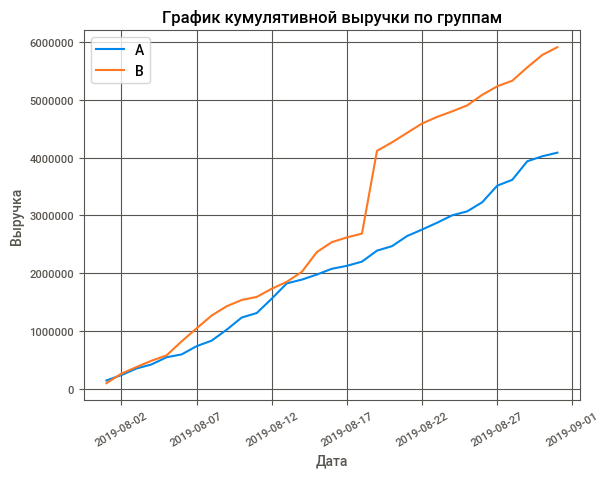

In [29]:
pd.plotting.register_matplotlib_converters()

locator = ticker.AutoLocator()
formatter = mdates.DateFormatter('%Y-%m-%d')


fig, ax = plt.subplots() 
ax.plot('date', 'revenue_a', data=cumulative_final, label='A')
ax.plot('date', 'revenue_b', data=cumulative_final, label='B')
ax.legend(loc="upper left")

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30)

ax.grid(True) 
ax.set_xlabel('Дата')
ax.set_ylabel('Выручка')

plt.title('График кумулятивной выручки по группам',
         fontweight ='bold')


plt.show()

За все дни теста кумулятивная выручка по всем пользователям растет. При этом выручка пользователей группы "В" выше, чем пользователей группы "А".<br>
Выручка покупателей из группы "В" примерно 18 августа резко возросла в 1,5 раза. Затем кумулятивная выручка для этой группы продолжала расти,  превышая кумулятивную выручку пользователей группы "А" примерно в 1,5 раза.<br>
Такой рост может быть связан либо с каким-то событием, либо с аномалиями в группе.<br>
Но пока мы не посчитали стат значимость полученных значений, выводы делать рано.

### Кумулятивный средний чек

Построим график кумулятивного среднего чека по получившейся таблице. Сначала в таблицу cumulative_final добавим 2 столбца со значениями среднего чека для группы "А" и для группы "В". Средний чек найдем как частное от деления суммарной выручки на количество покупок.

In [30]:
#средний чек для группы А
cumulative_final['avg_bill_a'] = (cumulative_final['revenue_a'] / cumulative_final['payments_a'])

#средний чек для группы В
cumulative_final['avg_bill_b'] = cumulative_final['revenue_b'] / cumulative_final['payments_b']

cumulative_final = cumulative_final.round({'avg_bill_a':2, 'avg_bill_b': 2})

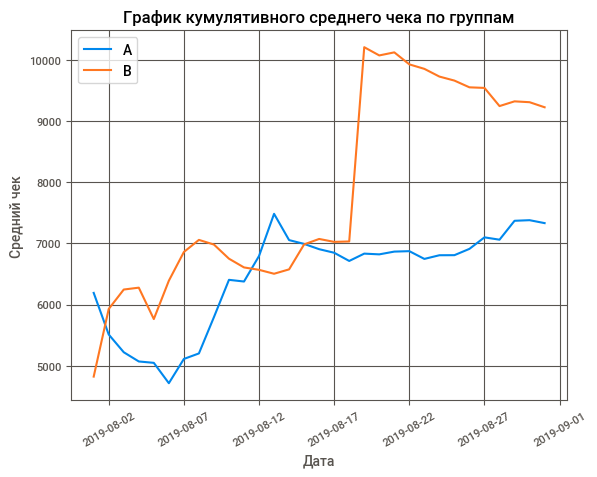

In [31]:
pd.plotting.register_matplotlib_converters()

locator = ticker.AutoLocator()
formatter = mdates.DateFormatter('%Y-%m-%d')


fig, ax = plt.subplots() 
ax.plot('date', 'avg_bill_a', data=cumulative_final, label='A')
ax.plot('date', 'avg_bill_b', data=cumulative_final, label='B')
ax.legend(loc="upper left")

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30)

ax.grid(True) 
ax.set_xlabel('Дата')
ax.set_ylabel('Средний чек')

plt.title('График кумулятивного среднего чека по группам',
         fontweight ='bold')


plt.show()

Кумулятивное значение среднего чека для обеих групп колеблется (как растёт, так и падает).<br>
Для группы "В" тоже примерно 18 августа наблюдается резкий скачок кумулятивного значения среднего чека вверх примерно на 3000 (с 7000 до 10200). Но затем кумулятивный средний чек начинает падать.<br>
Для группы "А" с 6 по 13 августа кумулятивный средний чек сильно растет, но после 14 августа начинает падать.<br>
Пока не понятна общая тендеция, смотрим на метрики дальше.<br>
Средний чек в группе "В" мог так резко вырасти из-за того, что случились аномально большие заказы, и дело совсем не в их количестве

### Относительное изменение кумулятивного среднего чека

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Для этого разделим значения среднего чека группы "В" для каждой из дат на значения среднего чека группы "А" для каждой из дат.

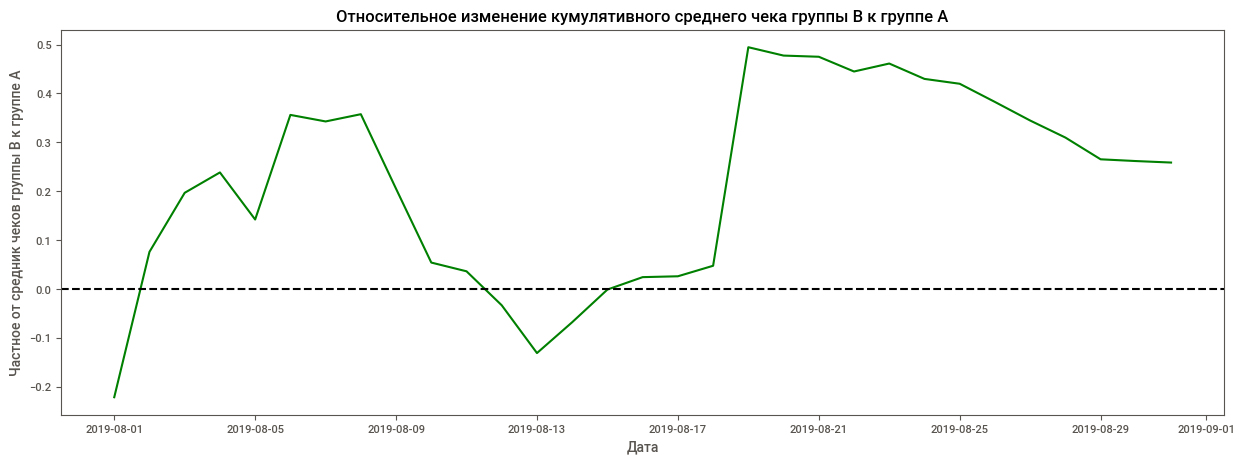

In [32]:
plt.figure(figsize=[15,5])

plt.plot(cumulative_final['date'], (cumulative_final['avg_bill_b'] / cumulative_final['avg_bill_a'] - 1), color='green')


plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Частное от средник чеков группы В к группе А')

plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

Примерно со 2 августа по 12 августа кумулятивный ср чек группы "В" больше, чем у группы "А".<br>
С 12 августа по 15 августа средний чек группы "А" больше, чем у группы "В". <br>
С 15 августа средний чек группы "В" опять больше среднего чека группы "А". При этом резкий скачок наблюдается примерно 18 августа.<br>
Возможно, что-то сильно повлияло на группу "В" около 18 августа. Либо это результат влияния выбросов. Смотрим дальше.

### Кумулятивная конверсия

Построим график кумулятивной конверсии по группам. Для этого посчитаем конверсию для каждой из групп путем нахождения частного от деления числа количество посетителей с целевым действием (=покупателей) к общему числу посетителей.

In [33]:
#конверсия для группы А
cumulative_final['conversion_a'] = (cumulative_final['buyers_a'] / cumulative_final['visitors_a'])

#конверсия для группы В
cumulative_final['conversion_b'] = cumulative_final['buyers_b'] / cumulative_final['visitors_b']


Не будем округлять данные, т.к. иначе график конверсии будет очень заостренным

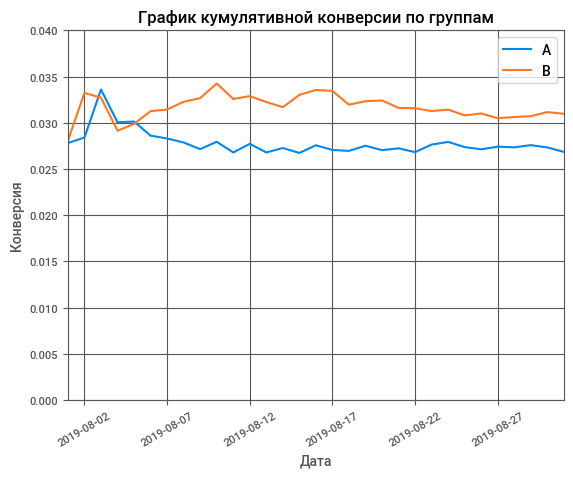

In [34]:
pd.plotting.register_matplotlib_converters()

locator = ticker.AutoLocator()
formatter = mdates.DateFormatter('%Y-%m-%d')


fig, ax = plt.subplots() 
ax.plot('date', 'conversion_a', data=cumulative_final, label='A')
ax.plot('date', 'conversion_b', data=cumulative_final, label='B')
ax.legend(loc="upper right")

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30)

ax.grid(True) 
ax.set_xlabel('Дата')
ax.set_ylabel('Конверсия')

plt.title('График кумулятивной конверсии по группам',
         fontweight ='bold')

#зададим масштаб осей. В противном случае у нас график будет очень сильно колебаться, 
#из-за чего мы можем неправильные выводы сделать
plt.axis(["2019-08-01", '2019-08-31', 0.0, 0.04]) 

plt.show()

Конверсия посетителей из группы "В" примерно с 6 августа стаблильно выше, чем у пользователей группы "А". К конце тестового периода конверсия группы В все так же выше, чем конверсия группы А. <br>
Обе конверсии колеблются с 22.08.2019 в пределах +-0,001. Думаю, это допустимое колебание и можно сказать, что конверсия зафиксировалась

### Относительное изменение кумулятивной конверсии

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

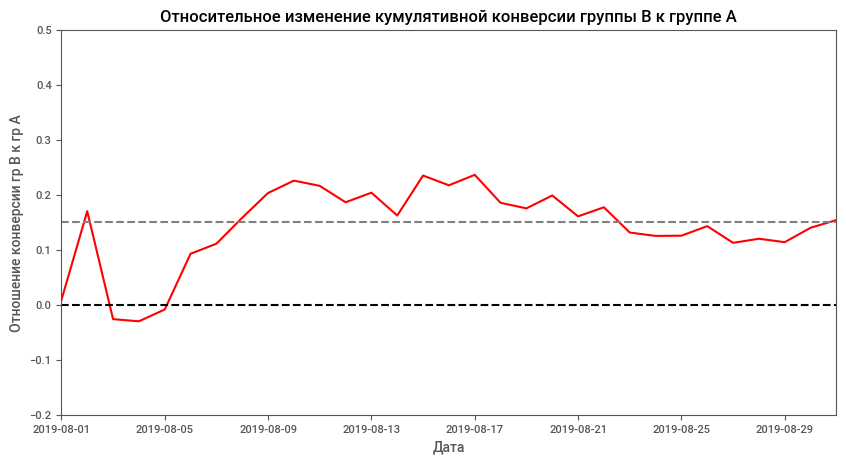

In [35]:
plt.figure(figsize=[10,5])

plt.plot(cumulative_final['date'], (cumulative_final['conversion_b'] / cumulative_final['conversion_a'] - 1), color='red')


plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии гр В к гр А')

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.5]) 

plt.show()

В начале теста с 3 августа по 6 августа группа "В" проигрывала в конвресии группе "А".<br>
Группа "В" стабильно лидирует по конвресии с 06.08.2019. В Конце тестового периода конвресия зафиксировалась около прироста в 15% относительно группы А.

### Количество заказов по пользователям

Найдем количество заказов и количество пользователей, их совершивших.

In [36]:
#сгруппируем данные из файла orders по Id посетителей и посчитаем для каждого посетителя количество заказов
orders_by_users = orders.groupby('visitorId', as_index = False)['transactionId'].nunique()

#переименуем колонки 
orders_by_users .columns = ['visitor_id', 'orders']

orders_by_users .sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


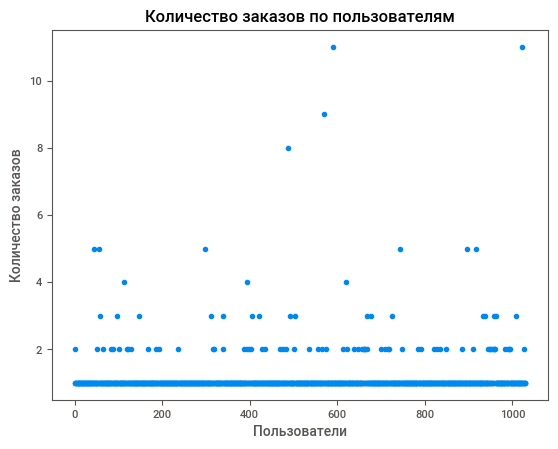

In [37]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders']) 

plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

plt.show()

Большинство пользователей совершали от 0 до 2-х заказов. Присутствует количество заказов, равное 8, 10. Их точная доля не ясна — непонятно, считать их аномалиями или нет.


### Перцентили количества заказов

Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [38]:
percentile_orders = np.percentile(orders_by_users['orders'], [95, 99])
percentile_orders

array([2., 4.])

Не более 1% пользователей оформляли больше чем 4 заказа. Не более 5% пользователей оформляли больше 2-х заказов. <br>
Выберем границу в 4 заказа, как нижнюю границу числа заказов. Отсеим аномальных пользователей по этой границе.

### Точечный график стоимостей заказов

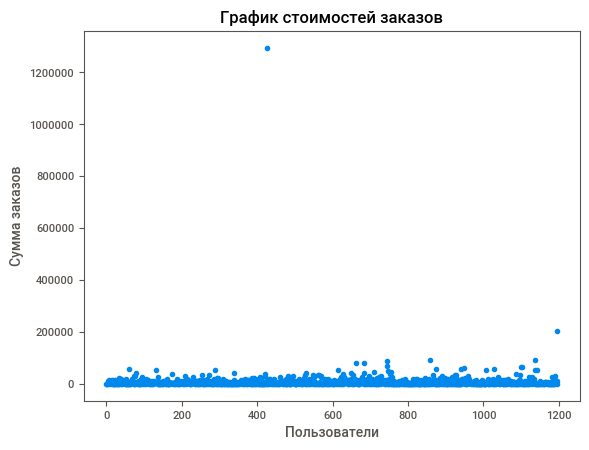

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказов')

plt.show()

Большинство  заказов суммой до 100 000. Но есть какой-то заказ на сумму более чем 1,2 * 10^6 (1200000). <br>
Построим точечный график стоимости заказов без этого дорогого заказа.

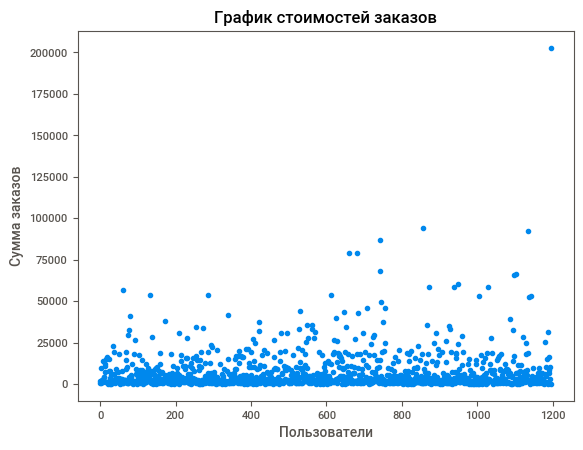

In [40]:
#найдем максимальное значение покупки в данных о заказах
max_revenue = orders['revenue'].max()

#отфильтруем данные по нужному нам значению
filtered_orders_revenue = orders.query('revenue < @max_revenue')

#строим график
x_values = pd.Series(range(0,len(filtered_orders_revenue['revenue'])))
plt.scatter(x_values, filtered_orders_revenue['revenue'])

plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказов')

plt.show()

### Перцентили стоимости заказов

Посчитаем выборочные перцентили суммы заказов

In [41]:
percentile_revenue = np.percentile(orders['revenue'], [95, 99])
percentile_revenue

array([28000. , 58233.2])

Не более 5% заказов на сумму дороде 28000 руб и не более 1% заказов на сумму дороже 58233 рублей. <br>
Выберем границу в 28000, как нижнюю границу стоимости заказов. Отсеим аномальных пользователей по этой границе.

### Статистическая значимость различий в среднем чеке по "сырым" данным

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. <br>
**Нулевая:** различий в среднем чеке между группами нет. <br>
**Альтернативная:** различия в в среднем чеке между группами есть.<br>
Значение уровня значимости α = 0,05<br>
Метод проверки гипотез: критериий Манна-Уитни

In [42]:
print('p-value =', 
      '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Средние чеки отличаются в', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1), 
      'раз') 

p-value = 0.729
Средние чеки отличаются в 0.259 раз


p-value больше 0,05 (уровня значимости) в несколько раз. Вероятность того, что полученные данные случайные -  73%. Вероятность относительно высока — данные не дают основания отвергнуть нулевую гипотезу. <br>
То есть конкретно для наших двух выборок мы видим разницу в 0.259, но мы не можем сказать, что у генеральных совокупностей тоже будет такая разница.

### Статистическая значимость различий в среднем чеке между группами по «очищенным» данным

Очистим данные от пользователей, которые совершили 4 и более заказа и купили на сумму более 28000.

In [43]:
#сгруппируем данные по заказам: выберем пользователей только из группы А
# и посчитаем для каждого количество покупок
orders_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

#переименуем колонки
orders_a.columns = ['user_id', 'orders']

Сделаем то же самое, только для группы "В".

In [44]:
orders_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

#переименуем колонки
orders_b.columns = ['user_id', 'orders']

In [45]:
#зададим переменную, в которую "положим пользователей" с большим количеством заказов
users_with_many_orders = pd.concat(
    [
        orders_a[orders_a['orders'] >= percentile_orders[1]] ['user_id'],
        orders_b[orders_b['orders'] >= percentile_orders[1]] ['user_id'],
    ],
    axis=0,
)

#посчитаем количество этих пользователей
len(users_with_many_orders)

12

Всего 12 пользователей из 1031 сделали 4 и более заказов

In [46]:
#зададим переменную, в которую положим пользователей с дорогими заказами
users_with_expensive_orders = orders[orders['revenue'] >  percentile_revenue[0]]['visitorId']
len(users_with_expensive_orders)

60

60 пользователей из 1031 сделали покупки на сумму более 28000

In [47]:
#объединим пользоавтелей из users_with_expensive_orders и users_with_many_orders 

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users 

1099     148427295
18       199603092
928      204675465
23       237748145
684      358944393
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Length: 63, dtype: int64

У нас есть 63 пользователя, которых мы не должны включать при подсчёте p-value.  Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Применим статистический критерий Манна-Уитни к полученным выборкам:

In [48]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users )),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users )),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.977
-0.017


Значение p-value по неочищенным данным = 0.729. Значение p-value по очищенным данным = 0.977<br>
p-value увеличился и он все так же больше уровня значимости (0,05).<br>
Получается, наши данные не статистически значимы и различия между средними чеками в группах нет.<br>

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы. <br>
**Нулевая:** различий в конверсии между группами нет. <br>
**Альтернативная:** различия в конверсии между группами есть.<br>
Значение уровня значимости α = 0,05<br>
Метод проверки гипотез: критериий Манна-Уитни

In [49]:
#зададим переменную
sampleA = pd.concat(
    [
#состоящую из списка с количеством заказов для каждого из пользователей из гр А
        orders_a['orders'],
#и нулей для пользователей, которые ничего не заказывали
        pd.Series(
            0,
# их количество равно разнице между суммой посетителей и количеством записей о заказах
            index=np.arange(
                visits[visits['group']=='A']['visitors'].sum() - len(orders_a['orders'])
            ),
            name='orders',
        ),
    ],
#объединим данные по строкам
    axis=0,
)


#то же самое делаем для sampleB
sampleB = pd.concat(
    [
        orders_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group']=='B']['visitors'].sum() - len(orders_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


#применим критерий Манна_уйитни для подсчета стат значимости конверсии
print('p-value по сырым данным =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Конверсии различаются в', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1), 'раз')

p-value по сырым данным = 0.017
Конверсии различаются в 0.138 раз


p-value < 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.<br>
Значит по сырым данным различия в конверсии групп "А" и "В" есть. <br>
Конверсия группы "В" больше конверсии группы "А" в 0,14 раз.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

 Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [50]:
sampleAFiltered = pd.concat(
    [
        orders_a[
            np.logical_not(orders_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group']=='A']['visitors'].sum() - len(orders_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        orders_b[
            np.logical_not(orders_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group']=='B']['visitors'].sum() - len(orders_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.018
0.148


Значение p-value по неочищенным данным = 0.017. Значение p-value по очищенным данным = 0.018<br>
p-value увеличился и он все так же меньше уровня значимости (0,05).<br>
Конверсия группы "В" по отфильтрованным данным больше конверсии группы "А" в 0,15 раз.

## Вывод

И по «сырым», и по данным после фильтрации аномалий мы можем сказать, что различия между средними чеками пользователей из разных групп нет. <br>
И по «сырым», и по данным после фильтрации аномалий мы можем сказать. что пользователи группы "В" конвертируются лучше.<br>
Так как главная цель бизнеса - увеличение общей выручки, я бы рекомендовала остановить тест, приняв во внимание, что пользователи группы "В" конвертируются лучше, хоть и не приносят бОльшей прибыли.